![dphi banner](https://dphi-courses.s3.ap-south-1.amazonaws.com/Datathons/dphi_banner.png)

# Bank Marketing Datathon
## Objective Predict if a Customer will subscribe the product or not (1 or 0)
## Context

A bank is a financial institution licensed to receive deposits and make loans. Banks may also provide financial services such as wealth management, currency exchange, and safe deposit boxes. Marketing refers to activities a company undertakes to promote the buying or selling of a product or service. Marketing includes advertising, selling, and delivering products to consumers or other businesses. [source of information: Investopedia]


![BANK](https://dphi-courses.s3.ap-south-1.amazonaws.com/Datathons/bank.png)

**Bank Marketing**

**Marketing of bank** products refers to the various ways in which a bank can help a customer, such as operating accounts, making transfers, paying standing orders and selling foreign currency. Banking is the business activity of banks and similar institutions.

 

## Objective
The marketing team of the bank has data related to direct marketing campaigns of the previous year. The marketing campaigns were based on phone calls. Often, more than one contact with the same client was required, in order to assess if the product would be ('yes') or not ('no') subscribed. The bank conducted a similar marketing campaign this year too and stored the data related to each phone call. 

Imagine you are hired as a Data Scientist in a bank in Portugal. The bank manager decided to take your help and understand whether a client would subscribe to the product or not. You are required to build a Machine Learning Model that would predict if a customer will subscribe to the product or not. Here the product is nothing but a term deposit. 

**What is a term deposit?**

A term deposit is a fixed-term investment that includes the deposit of money into an account at a financial institution. Term deposit investments usually carry short-term maturities ranging from one month to a few years and will have varying levels of required minimum deposits. [source of information: Investopedia]


![TERMDEPOSIT](https://dphi-courses.s3.ap-south-1.amazonaws.com/Datathons/term_deposits.png)

## Evaluation Criteria
Submissions are evaluated using F1 Score.  

![](https://dphi-courses.s3.ap-south-1.amazonaws.com/Datathons/f1_score.png)

**How do we do it?**

Once you generate and submit the target variable predictions on the testing dataset, your submissions will be compared with the true values of the target variable. 

The True or Actual values of the target variable are hidden on the DPhi platform so that we can evaluate your model's performance on unseen data. Finally, an F1 score for your model will be generated and displayed. 

# Loading Libraries 

In [ ]:

import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Load Train Data & Test Data


In [ ]:
# Train Data
train_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/bank_marketing_data/training_set_label.csv", sep=',', na_values=['NA'])

In [ ]:
train_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribe
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [ ]:
# Test Data
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/bank_marketing_data/testing_set_label.csv', na_values= ['NA'])

In [ ]:
test_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure
1,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other
2,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown
3,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown
4,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure


# Preprocessing DATA

## Function to Transoform Data 

In [ ]:
def categorize(df):
    new_df = df.copy()
    le = preprocessing.LabelEncoder()
    
    new_df['job'] = le.fit_transform(new_df['job'])
    new_df['marital'] = le.fit_transform(new_df['marital'])
    new_df['education'] = le.fit_transform(new_df['education'])
    new_df['default'] = le.fit_transform(new_df['default'])
    new_df['housing'] = le.fit_transform(new_df['housing'])
    new_df['month'] = le.fit_transform(new_df['month'])
    new_df['loan'] = le.fit_transform(new_df['loan'])
    new_df['contact'] = le.fit_transform(new_df['contact'])
    new_df['poutcome'] = le.fit_transform(new_df['poutcome'])
    #new_df['y'] = le.fit_transform(new_df['y'])
    return new_df

In [ ]:
train_data.isnull().sum()


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
subscribe    0
dtype: int64

In [ ]:
test_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

# Data Visualization

## Visualization of TRAIN DATA

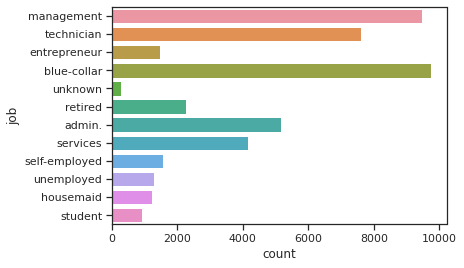

In [ ]:
sns.set(style="ticks", color_codes=True)
sns.countplot(y='job', data=train_data)

In [ ]:
#Get ride of Unknown job....
#train_data = train_data[train_data.job != 'unknown']

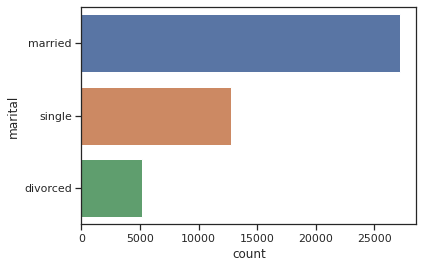

In [ ]:
sns.countplot(y='marital', data=train_data)

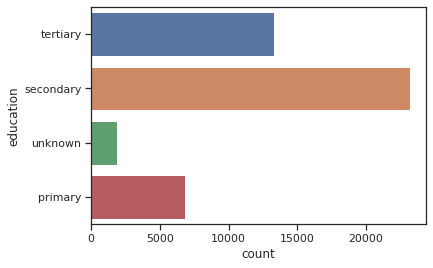

In [ ]:
sns.countplot(y='education', data=train_data)
# Tertiary is higher education ...

In [ ]:
#Get ride of Unknown education....
#train_data = train_data[train_data.education != 'unknown']

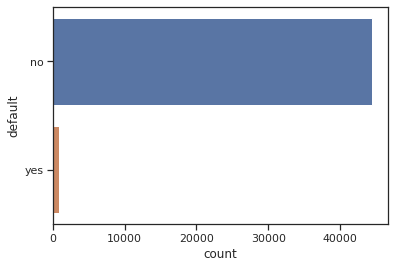

In [ ]:
sns.countplot(y='default', data=train_data)


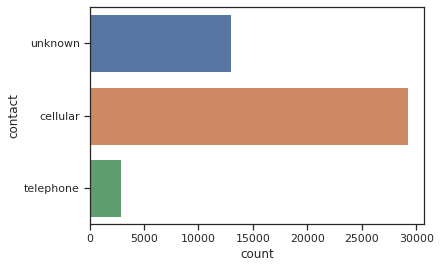

In [ ]:
sns.countplot(y='contact', data=train_data)


In [ ]:
#Get ride of Unknown contact....
#train_data = train_data[train_data.contact != 'unknown']

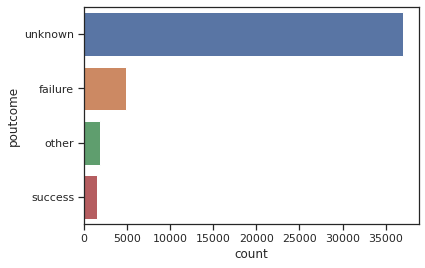

In [ ]:
sns.countplot(y='poutcome', data=train_data)

In [ ]:
#Get ride of Unknown poutcome....
#train_data = train_data[train_data.poutcome != 'unknown'] if so it will erase most of the recordes about 20K..

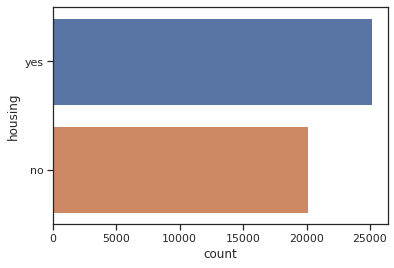

In [ ]:
sns.countplot(y='housing', data=train_data)

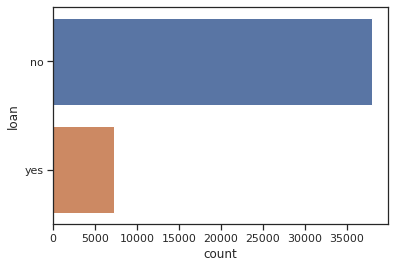

In [ ]:
sns.countplot(y='loan', data=train_data)

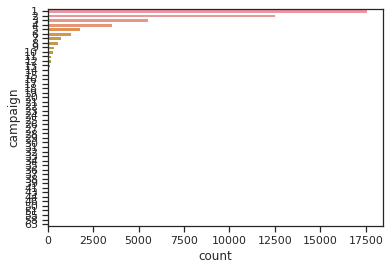

In [ ]:
sns.countplot(y='campaign', data=train_data)

In [ ]:
train_data.campaign.value_counts()

1     17544
2     12505
3      5521
4      3522
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
23       22
25       22
24       20
28       16
29       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
36        4
35        4
43        3
38        3
41        2
50        2
37        2
51        1
55        1
46        1
58        1
44        1
39        1
63        1
Name: campaign, dtype: int64

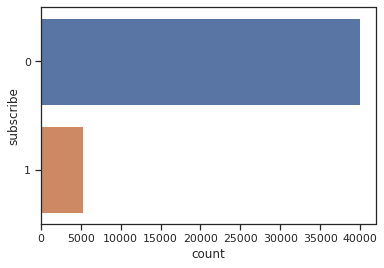

In [ ]:
sns.countplot(y='subscribe', data=train_data)

In [ ]:
train_data.describe()

,age,balance,day,duration,campaign,pdays,previous,subscribe
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


In [ ]:
train_data = categorize(train_data)
#train_data = train_data.convert_objects(convert_numeric=True)

In [ ]:
train_data.shape

(45211, 17)

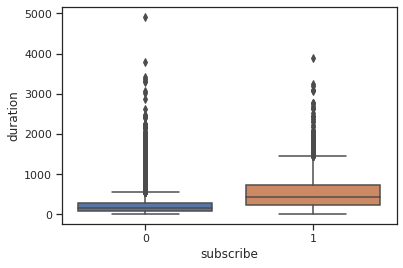

In [ ]:
sns.boxplot(x='subscribe', y='duration', data=train_data)


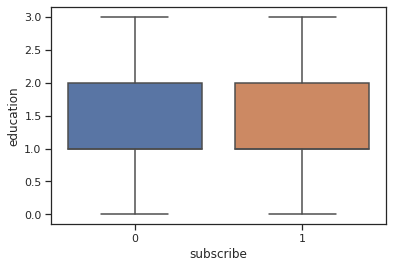

In [ ]:
sns.boxplot(x='subscribe', y='education', data=train_data)


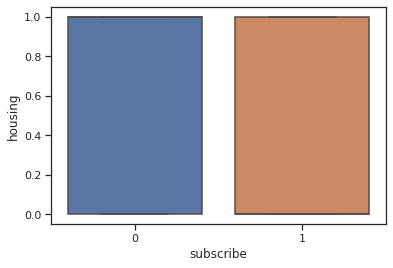

In [ ]:
sns.boxplot(x='subscribe', y='housing', data=train_data)


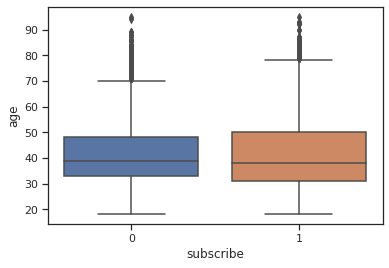

In [ ]:
sns.boxplot(x='subscribe', y='age', data=train_data)


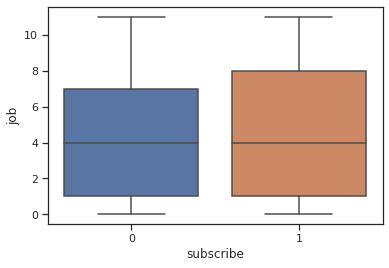

In [ ]:
sns.boxplot(x='subscribe', y='job', data=train_data)


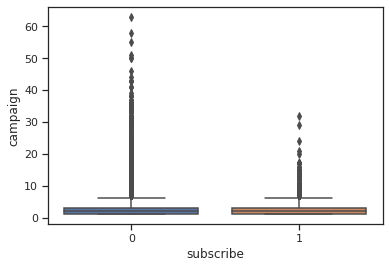

In [ ]:
sns.boxplot(x='subscribe', y='campaign', data=train_data)


## Removing Outliers

I was going to remove outliers but a certain step I rolled back .


In [ ]:
"""
def remove_outliers(df, column , minimum, maximum):
    col_values = df[column].values
    df[column] = np.where(np.logical_or(col_values<minimum, col_values>maximum), col_values.mean(), col_values)
    return df
"""

In [ ]:
"""
min_val = train_data["duration"].min()
max_val = 1500
train_data = remove_outliers(df=train_data, column='duration' , minimum=min_val, maximum=max_val)

min_val = train_data["age"].min()
max_val = 80
train_data = remove_outliers(df=train_data, column='age' , minimum=min_val, maximum=max_val)

min_val = train_data["campaign"].min()
max_val = 6
train_data = remove_outliers(df=train_data, column='campaign' , minimum=min_val, maximum=max_val)
"""

## Function to Groupe the Age feature and the Duration also.

In [ ]:
#function to creat group of ages, this helps because we have 78 differente values here
def age(dataframe):
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 47), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 47) & (dataframe['age'] <= 70), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 70) & (dataframe['age'] <= 98), 'age'] = 4
           
    return dataframe

def duration(data):

    data.loc[data['duration'] <= 102, 'duration'] = 1
    data.loc[(data['duration'] > 102) & (data['duration'] <= 180)  , 'duration']    = 2
    data.loc[(data['duration'] > 180) & (data['duration'] <= 319)  , 'duration']   = 3
    data.loc[(data['duration'] > 319) & (data['duration'] <= 644.5), 'duration'] = 4
    data.loc[data['duration']  > 644.5, 'duration'] = 5

    return data

In [ ]:
train_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribe
0,3,4,1,2,0,2143,1,0,2,5,8,3,1,-1,0,3,0
1,2,9,2,1,0,29,1,0,2,5,8,2,1,-1,0,3,0
2,2,2,1,1,0,2,1,1,2,5,8,1,1,-1,0,3,0
3,2,1,1,3,0,1506,1,0,2,5,8,1,1,-1,0,3,0
4,2,11,2,3,0,1,0,0,2,5,8,3,1,-1,0,3,0


In [ ]:
train_data = age(train_data).astype(int)
train_data = duration(train_data).astype(int)

## Dropping less meaningful columns

But rolled back in that decision ....

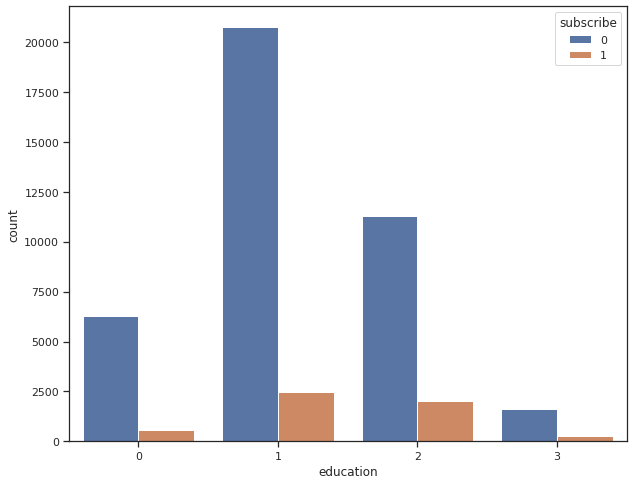

In [ ]:

sns.countplot(x='education',hue='subscribe',data=train_data)


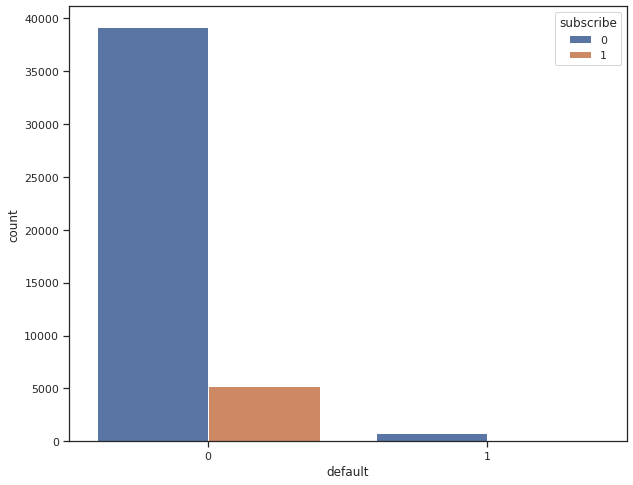

In [ ]:
sns.countplot(x='default',hue='subscribe',data=train_data)


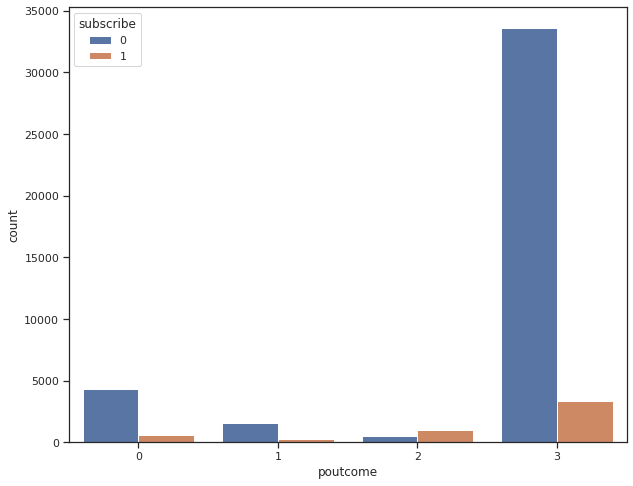

In [ ]:
sns.countplot(x='poutcome',hue='subscribe',data=train_data)


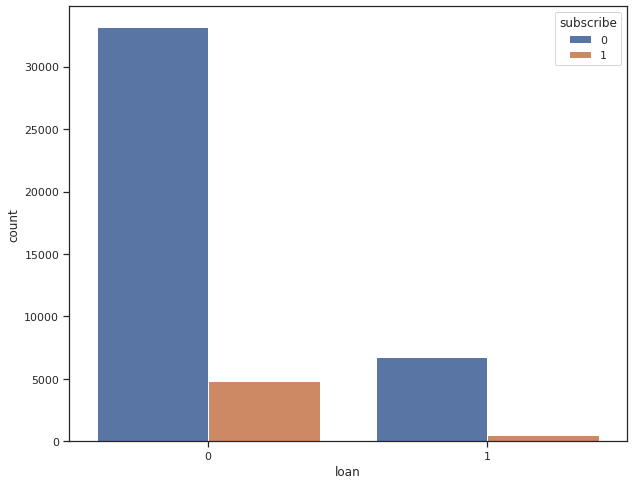

In [ ]:
sns.countplot(x='loan',hue='subscribe',data=train_data)


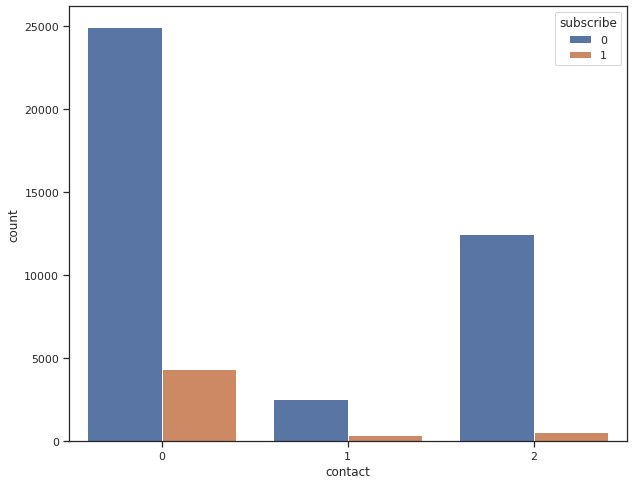

In [ ]:
sns.countplot(x='contact',hue='subscribe',data=train_data)


In [ ]:
#train_data = train_data.drop(['default','poutcome','contact'], axis=1) # they are skewed to 0....

In [ ]:
train_data.shape

(45211, 17)

#  Imbalance Dataset about 95%
```
So let us resample the minority data which is '1' and try to upSample it.
```

In [ ]:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [ ]:
#IMBALANCED DATASET FIX
df_majority = train_data[train_data.subscribe == 0]
df_minority = train_data[train_data.subscribe == 1]

In [ ]:
len(df_majority)

39922

In [ ]:
#IMBALANCED DATASET FIX
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    
                                 n_samples= int(39922),    
                                 random_state=123) 

In [ ]:
#IMBALANCED DATASET FIX
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
y_new = df_upsampled[df_upsampled.subscribe==1]

In [ ]:
df_upsampled

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribe
0,3,4,1,2,0,2143,1,0,2,5,8,3,1,-1,0,3,0
1,2,9,2,1,0,29,1,0,2,5,8,2,1,-1,0,3,0
2,2,2,1,1,0,2,1,1,2,5,8,1,1,-1,0,3,0
3,2,1,1,3,0,1506,1,0,2,5,8,1,1,-1,0,3,0
4,2,11,2,3,0,1,0,0,2,5,8,3,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43381,3,3,2,2,0,1947,0,0,2,30,7,2,1,-1,0,3,1
8218,2,9,2,1,1,-1129,1,0,2,2,6,4,5,-1,0,3,1
33968,2,4,1,2,0,193,1,0,0,30,0,4,1,13,1,0,1
44808,2,9,1,2,0,376,0,0,0,16,11,2,1,-1,0,3,1


In [ ]:
# Input Data and Target Data

X = df_upsampled.drop('subscribe',axis=1)
y = df_upsampled['subscribe']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.3, random_state = 42)

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)

In [ ]:
#pca = PCA(n_components=16)
#pca.fit(X_train)
#X_train = pca.fit_transform(X_train)

In [ ]:
X_train.shape

(55890, 16)

# Building different Models and validating using 10 fold cross validation

In [ ]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decison-Tree', DecisionTreeClassifier()))
models.append(('Gaussian', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RandForest',RandomForestClassifier(n_estimators = 200, n_jobs=2, random_state = 12)))
models.append(('ADA', AdaBoostClassifier(n_estimators = 120)))
models.append(('XGB',XGBClassifier()))

In [ ]:
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=42);
    cv_results = model_selection.cross_val_score(model, X_train, y_train, n_jobs=2,cv=kfold, scoring='accuracy');
    results.append(cv_results.mean());
    names.append(name);
    msg = "{}: ,Accuracy ={}".format(name, cv_results.mean());
    print(msg);

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



LR: ,Accuracy =0.7830560028627661
LDA: ,Accuracy =0.7831454643048847
KNN: ,Accuracy =0.8781177312578279
Decison-Tree: ,Accuracy =0.9499910538557881
Gaussian: ,Accuracy =0.7345142243692968


/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



SVM: ,Accuracy =0.8372338522096976
RandForest: ,Accuracy =0.9610484881016284
ADA: ,Accuracy =0.8252102343889783
XGB: ,Accuracy =0.8373769905170871


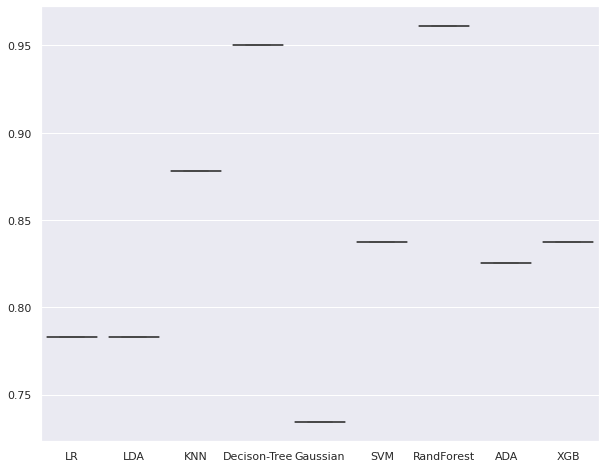

In [ ]:
sns.set(rc={'figure.figsize':(10,8)})
sns.boxplot(names,results)

In [ ]:
results_f1 = []
names_f1 = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=42);
    cv_results_1 = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='f1');
    results_f1.append(cv_results_1.mean());
    names_f1.append(name);
    msg = "{}: ,F1-score= {}".format(name, cv_results_1.mean());
    print(msg);

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



LR: ,F1-score= 0.7866984333555624


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



LDA: ,F1-score= 0.7891737816204056


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



KNN: ,F1-score= 0.8866205563095825


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



Decison-Tree: ,F1-score= 0.9516493506907109


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



Gaussian: ,F1-score= 0.7434098813049109


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



SVM: ,F1-score= 0.84201910176744


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



RandForest: ,F1-score= 0.9623706850013983


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



ADA: ,F1-score= 0.8252441212575758


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



XGB: ,F1-score= 0.8409732861216485


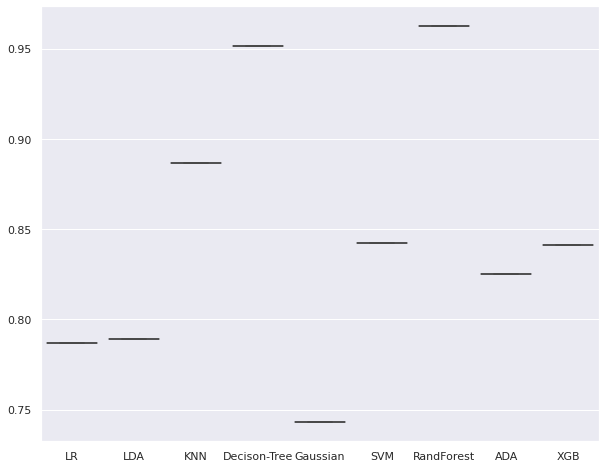

In [ ]:
sns.set(rc={'figure.figsize':(10,8)})
sns.boxplot(names_f1,results_f1)

In [ ]:
dict = {'Models': names, 'Accuracy_Score': results, 'F1-Score': results_f1} 
class_models = pd.DataFrame(dict)


In [ ]:
class_models.head()

,Models,Accuracy_Score,F1-Score
0,LR,0.783056,0.786698
1,LDA,0.783145,0.789174
2,KNN,0.878118,0.886621
3,Decison-Tree,0.949991,0.951649
4,Gaussian,0.734514,0.743410


In [ ]:
class_models.sort_values(by='Accuracy_Score', ascending=False)

,Models,Accuracy_Score,F1-Score
6,RandForest,0.961048,0.962371
3,Decison-Tree,0.949991,0.951649
2,KNN,0.878118,0.886621
8,XGB,0.837377,0.840973
5,SVM,0.837234,0.842019
7,ADA,0.825210,0.825244
1,LDA,0.783145,0.789174
0,LR,0.783056,0.786698
4,Gaussian,0.734514,0.743410


In [ ]:
scaler.fit(X_val)
X_val = scaler.fit_transform(X_val)

In [ ]:
#pca.fit(X_val)
#X_val = pca.fit_transform(X_val)

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
predictions_dtc = dtc.predict(X_val)
print("Decision Tree Classifier:_________")
print("Accuracy : ", accuracy_score(y_val, predictions_dtc))
print("Confusion Matrix : \n",confusion_matrix(y_val, predictions_dtc))
print("Classification Report: \n",classification_report(y_val, predictions_dtc))
print("_____________________________________________________________________")

Decision Tree Classifier:_________
Accuracy :  0.9202638390247976
Confusion Matrix : 
 [[10943  1024]
 [  886 11101]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.91      0.92     11967
           1       0.92      0.93      0.92     11987

    accuracy                           0.92     23954
   macro avg       0.92      0.92      0.92     23954
weighted avg       0.92      0.92      0.92     23954

_____________________________________________________________________


In [ ]:
rfc = RandomForestClassifier(n_estimators = 200, n_jobs=2, random_state = 12)
rfc.fit(X_train, y_train)
predictions_rfc = rfc.predict(X_val)
print("Accuracy : ", accuracy_score(y_val, predictions_rfc))
print("Confusion Matrix : \n",confusion_matrix(y_val, predictions_rfc))
print("Classification Report: \n",classification_report(y_val, predictions_rfc))

Accuracy :  0.966727895132337
Confusion Matrix : 
 [[11189   778]
 [   19 11968]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.93      0.97     11967
           1       0.94      1.00      0.97     11987

    accuracy                           0.97     23954
   macro avg       0.97      0.97      0.97     23954
weighted avg       0.97      0.97      0.97     23954



In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
predictions_xgb = xgb.predict(X_val)
print("Accuracy : ", accuracy_score(y_val, predictions_xgb))
print("Confusion Matrix : \n",confusion_matrix(y_val, predictions_xgb))
print("Classification Report: \n",classification_report(y_val, predictions_xgb))

Accuracy :  0.833305502212574
Confusion Matrix : 
 [[ 9772  2195]
 [ 1798 10189]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.82      0.83     11967
           1       0.82      0.85      0.84     11987

    accuracy                           0.83     23954
   macro avg       0.83      0.83      0.83     23954
weighted avg       0.83      0.83      0.83     23954



# Prepare test data for Preprocessing.....

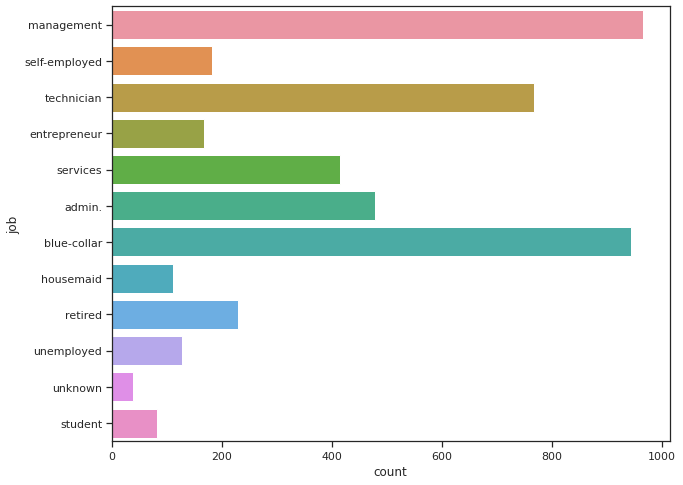

In [ ]:
sns.set(style="ticks", color_codes=True)
sns.countplot(y='job', data=test_data)

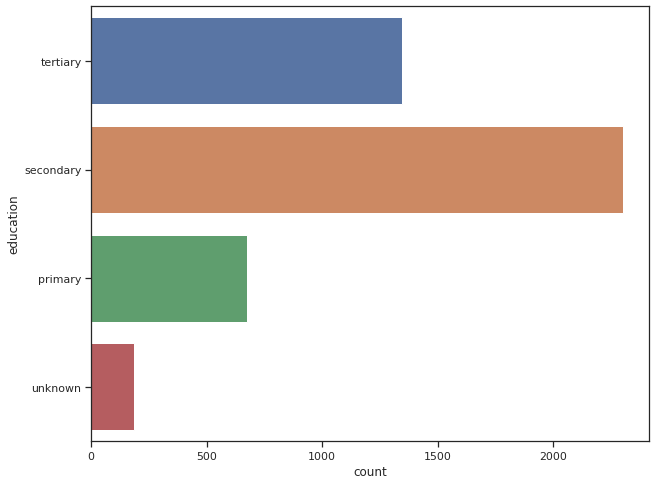

In [ ]:
sns.set(style="ticks", color_codes=True)
sns.countplot(y='education', data=test_data)

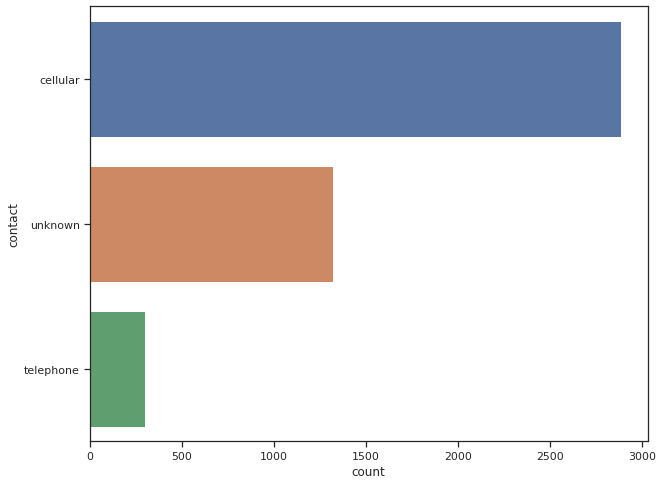

In [ ]:
sns.set(style="ticks", color_codes=True)
sns.countplot(y='contact', data=test_data)

In [ ]:
# Test Data
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/bank_marketing_data/testing_set_label.csv', na_values= ['NA'])
test_data.shape

(4509, 16)

In [ ]:
test_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure
1,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other
2,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown
3,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown
4,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure


In [ ]:
test_data = categorize(test_data)

In [ ]:
test_data = age(test_data).astype(int)
test_data = duration(test_data).astype(int)
test_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,2,4,2,2,0,747,0,0,0,23,3,2,2,176,3,0
1,2,6,1,2,0,307,1,0,0,14,8,4,1,330,2,1
2,2,9,1,1,0,147,1,0,0,6,8,2,2,-1,0,3
3,2,2,1,2,0,221,1,0,2,14,8,1,2,-1,0,3
4,2,7,1,0,0,-88,1,1,0,17,0,3,1,147,2,0


In [ ]:
#test_data = test_data.drop(['default','poutcome','contact'], axis=1) # they are skewed to 0....

In [ ]:
scaler = StandardScaler()
scaler.fit(test_data)
test_data = scaler.fit_transform(test_data)

#pca = PCA(n_components=16)
#pca.fit(test_data)
#test_data = pca.fit_transform(test_data)

In [ ]:
test_data


array([[-0.07642543, -0.12560514,  1.42100033, ...,  1.36437727,
         1.45387615, -2.58326022],
       [-0.07642543,  0.4886612 , -0.24582862, ...,  2.90507278,
         0.86270223, -1.57425811],
       [-0.07642543,  1.41006072, -0.24582862, ..., -0.4064221 ,
        -0.3196456 ,  0.4437461 ],
       ...,
       [ 1.28027637, -1.04700465, -0.24582862, ..., -0.4064221 ,
        -0.3196456 ,  0.4437461 ],
       [-0.07642543, -1.04700465, -0.24582862, ...,  1.1342734 ,
         0.27152832, -2.58326022],
       [-1.43312722,  0.79579437,  1.42100033, ..., -0.4064221 ,
        -0.3196456 ,  0.4437461 ]])

In [ ]:
# Predicting the target Y
print("Decision Tree Classifier:_________")
target_dtc = dtc.predict(test_data)
print("_____________________________________________________________________")
print("Random Forest Classifier:_________")
target_rfc = rfc.predict(test_data)
print("_____________________________________________________________________")

Decision Tree Classifier:_________
_____________________________________________________________________
Random Forest Classifier:_________
_____________________________________________________________________


In [ ]:
print("XGBOOST Classifier:_________")
target_xgb = xgb.predict(test_data)
print("_____________________________________________________________________")

XGBOOST Classifier:_________
_____________________________________________________________________


In [ ]:
test_data_1 = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/bank_marketing_data/testing_set_label.csv')


In [ ]:
test_data_1.shape

(4509, 16)

In [ ]:
# To create Dataframe of predicted value with particular respective index
res_dtc = pd.DataFrame(target_dtc) # target are nothing but the final predictions of your model on input features of your new unseen test data
res_dtc.index = test_data_1.index # its important for comparison. Here "test_new" is your new test dataset
res_dtc.columns = ["prediction"]
#res_lr['prediction'] = [str("'")+'yes'+str("'") if a==1 else str("'")+'no'+str("'") for a in res_lr['prediction']]
# To download the csv file locally
from google.colab import files
res_dtc.to_csv('submission_dtc.csv', index=False)         
files.download('submission_dtc.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# To create Dataframe of predicted value with particular respective index
res_rfc = pd.DataFrame(target_rfc) # target are nothing but the final predictions of your model on input features of your new unseen test data
res_rfc.index = test_data_1.index # its important for comparison. Here "test_new" is your new test dataset
res_rfc.columns = ["prediction"]
#res_rfc['prediction'] = [str("'")+'yes'+str("'") if a==1 else str("'")+'no'+str("'") for a in res_rfc['prediction']]
# To download the csv file locally
from google.colab import files
res_rfc.to_csv('submission_rfc.csv', index=False)         
files.download('submission_rfc.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# To create Dataframe of predicted value with particular respective index
res_xgb = pd.DataFrame(target_xgb) # target are nothing but the final predictions of your model on input features of your new unseen test data
res_xgb.index = test_data_1.index # its important for comparison. Here "test_new" is your new test dataset
res_xgb.columns = ["prediction"]
#res_rfc['prediction'] = [str("'")+'yes'+str("'") if a==1 else str("'")+'no'+str("'") for a in res_rfc['prediction']]
# To download the csv file locally
from google.colab import files
res_xgb.to_csv('submission_xgb.csv', index=False)         
files.download('submission_xgb.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>